In [5]:
# Instal ulang SEMUA library utama secara paksa agar versinya sinkron
!pip install --upgrade --force-reinstall numpy scipy scikit-learn pandas matplotlib seaborn yellowbrick

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached scipy-1.15.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.7 MB)
  Using cached scikit_learn-1.7.2-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.7 MB)
  Using cached pandas-2.3.3-cp310-cp310-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (12.8 MB)
  Using cached matplotlib-3.10.8-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.7 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl (348 kB)
  Using cach

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs

# --- 1. MEMBUAT CORE DATA (POLA TERSEMBUNYI) ---
# Kita buat 3 kelompok perilaku pelanggan berdasarkan 3 fitur utama:
# (Tenure, MonthlyCharges, Avg_Download_GB)
X_core, y = make_blobs(n_samples=1000, centers=3, n_features=3, cluster_std=5.0, random_state=42)

# Konversi ke DataFrame awal
df = pd.DataFrame(X_core, columns=['Tenure', 'MonthlyCharges', 'Avg_Download_GB'])

# Memperbaiki range angka biar masuk akal
df['Tenure'] = df['Tenure'].abs() * 2 + 5         # Bulan (5 - 70 bulan)
df['MonthlyCharges'] = df['MonthlyCharges'].abs() * 10 + 200 # Ribu Rupiah (200rb - 1jt)
df['Avg_Download_GB'] = df['Avg_Download_GB'].abs() + 10     # GB (10 - 100 GB)

# --- 2. MENAMBAH KOLOM LAIN (CATEGORICAL & ID) ---
# Customer ID
df.insert(0, 'CustomerID', [f'CUST-{i+1000}' for i in range(len(df))])

# Kolom InternetService (Random)
services = ['DSL', 'Fiber Optic', 'No', 'Fiber', 'dsl'] # Perhatikan ketidakkonsistenan penulisan!
df['InternetService'] = np.random.choice(services, len(df))

# Kolom TotalCharges (Seharusnya Tenure * Monthly, tapi kita buat nanti jadi string)
df['TotalCharges'] = df['Tenure'] * df['MonthlyCharges']

# --- 3. MERUSAK DATA (DATA DIRTYING) ---

# A. Masalah Tipe Data (TotalCharges jadi String karena ada spasi kosong)
# Kita ganti beberapa angka jadi spasi " " (ini sering terjadi di file CSV)
df.loc[10:20, 'TotalCharges'] = " " 
df.loc[50:55, 'TotalCharges'] = "Error"

# B. Masalah Missing Values (NaN)
df.loc[100:120, 'MonthlyCharges'] = np.nan
df.loc[300:310, 'InternetService'] = np.nan

# C. Masalah Outlier Ekstrem (Data Sampah)
# Ada pelanggan tenure 5000 bulan (mustahil, perusahaan baru 10 tahun)
df.loc[999, 'Tenure'] = 5000 
# Ada tagihan minus
df.loc[998, 'MonthlyCharges'] = -50000 

# D. Masalah Duplikat
# Kita copy data baris pertama dan masukkan lagi
df = pd.concat([df, df.iloc[:5]], ignore_index=True)

# Acak urutan
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print("=== DATA PELANGGAN INDOTELCO (MENTAH) ===")
print(df.head())
print("\n=== INFO DATASETS ===")
print(df.info())

=== DATA PELANGGAN INDOTELCO (MENTAH) ===
  CustomerID     Tenure  MonthlyCharges  Avg_Download_GB InternetService  \
0  CUST-1926   6.984034      283.527889        14.271823     Fiber Optic   
1  CUST-1630  17.259832      277.870188        13.020002           Fiber   
2  CUST-1682  11.104682      287.368613        15.936825             DSL   
3  CUST-1514  14.872056      334.034120        12.471627           Fiber   
4  CUST-1365  21.826164      289.936870        15.576795             dsl   

  TotalCharges  
0  1980.168499  
1   4795.99278  
2  3191.137036  
3  4967.774299  
4  6328.209704  

=== INFO DATASETS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1005 non-null   object 
 1   Tenure           1005 non-null   float64
 2   MonthlyCharges   984 non-null    float64
 3   Avg_Download_GB  1005 non-null   fl

/tmp/ipykernel_43574/1466643075.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value ' ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[10:20, 'TotalCharges'] = " "


In [4]:
df

,CustomerID,Tenure,MonthlyCharges,Avg_Download_GB,InternetService,TotalCharges
0,CUST-1926,6.984034,283.527889,14.271823,Fiber Optic,1980.168499
1,CUST-1630,17.259832,277.870188,13.020002,Fiber,4795.99278
2,CUST-1682,11.104682,287.368613,15.936825,DSL,3191.137036
3,CUST-1514,14.872056,334.034120,12.471627,Fiber,4967.774299
4,CUST-1365,21.826164,289.936870,15.576795,dsl,6328.209704
...,...,...,...,...,...,...
1000,CUST-1106,13.091890,NaN,16.213485,Fiber,2859.466579
1001,CUST-1270,11.459396,268.873797,18.804319,dsl,3081.131256
1002,CUST-1860,8.760759,214.988956,18.875669,dsl,1883.4665
1003,CUST-1435,21.534000,323.755726,11.525606,No,6971.755838


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1005 non-null   object 
 1   Tenure           1005 non-null   float64
 2   MonthlyCharges   984 non-null    float64
 3   Avg_Download_GB  1005 non-null   float64
 4   InternetService  994 non-null    object 
 5   TotalCharges     1005 non-null   object 
dtypes: float64(3), object(3)
memory usage: 47.2+ KB


In [4]:
df.isnull().sum()

CustomerID          0
Tenure              0
MonthlyCharges     21
Avg_Download_GB     0
InternetService    11
TotalCharges        0
dtype: int64

In [5]:
null = df[df['MonthlyCharges'].isnull()]
null

,CustomerID,Tenure,MonthlyCharges,Avg_Download_GB,InternetService,TotalCharges
19,CUST-1101,7.932999,NaN,18.640175,Fiber,1625.523365
70,CUST-1107,23.541275,NaN,15.308192,Fiber,8311.525511
137,CUST-1120,30.166970,NaN,16.125077,dsl,10078.902633
174,CUST-1110,13.821762,NaN,21.601508,No,4981.406219
247,CUST-1109,14.000335,NaN,13.087570,No,4108.262574
273,CUST-1118,18.009493,NaN,12.908394,dsl,5376.798625
395,CUST-1108,17.342562,NaN,12.576830,DSL,3558.206485
463,CUST-1113,26.634943,NaN,11.693371,dsl,7038.391088
467,CUST-1104,18.418763,NaN,11.759720,Fiber,4671.104894
468,CUST-1114,7.227710,NaN,17.906545,Fiber Optic,2343.255935


In [5]:
df["MonthlyCharges"] = df['MonthlyCharges'].fillna(df['MonthlyCharges'].median())
df

,CustomerID,Tenure,MonthlyCharges,Avg_Download_GB,InternetService,TotalCharges
0,CUST-1926,6.984034,283.527889,14.271823,Fiber Optic,1980.168499
1,CUST-1630,17.259832,277.870188,13.020002,Fiber,4795.99278
2,CUST-1682,11.104682,287.368613,15.936825,DSL,3191.137036
3,CUST-1514,14.872056,334.034120,12.471627,Fiber,4967.774299
4,CUST-1365,21.826164,289.936870,15.576795,dsl,6328.209704
...,...,...,...,...,...,...
1000,CUST-1106,13.091890,276.853004,16.213485,Fiber,2859.466579
1001,CUST-1270,11.459396,268.873797,18.804319,dsl,3081.131256
1002,CUST-1860,8.760759,214.988956,18.875669,dsl,1883.4665
1003,CUST-1435,21.534000,323.755726,11.525606,No,6971.755838


In [7]:
df.isnull().sum()

CustomerID          0
Tenure              0
MonthlyCharges      0
Avg_Download_GB     0
InternetService    11
TotalCharges        0
dtype: int64

In [6]:
df['InternetService'] = df['InternetService'].fillna(df['InternetService'].mode()[0])
df

,CustomerID,Tenure,MonthlyCharges,Avg_Download_GB,InternetService,TotalCharges
0,CUST-1926,6.984034,283.527889,14.271823,Fiber Optic,1980.168499
1,CUST-1630,17.259832,277.870188,13.020002,Fiber,4795.99278
2,CUST-1682,11.104682,287.368613,15.936825,DSL,3191.137036
3,CUST-1514,14.872056,334.034120,12.471627,Fiber,4967.774299
4,CUST-1365,21.826164,289.936870,15.576795,dsl,6328.209704
...,...,...,...,...,...,...
1000,CUST-1106,13.091890,276.853004,16.213485,Fiber,2859.466579
1001,CUST-1270,11.459396,268.873797,18.804319,dsl,3081.131256
1002,CUST-1860,8.760759,214.988956,18.875669,dsl,1883.4665
1003,CUST-1435,21.534000,323.755726,11.525606,No,6971.755838


In [10]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [11]:
df

,CustomerID,Tenure,MonthlyCharges,Avg_Download_GB,InternetService,TotalCharges
0,CUST-1926,6.984034,283.527889,14.271823,Fiber Optic,1980.168499
1,CUST-1630,17.259832,277.870188,13.020002,Fiber,4795.99278
2,CUST-1682,11.104682,287.368613,15.936825,DSL,3191.137036
3,CUST-1514,14.872056,334.034120,12.471627,Fiber,4967.774299
4,CUST-1365,21.826164,289.936870,15.576795,dsl,6328.209704
...,...,...,...,...,...,...
1000,CUST-1106,13.091890,276.853004,16.213485,Fiber,2859.466579
1001,CUST-1270,11.459396,268.873797,18.804319,dsl,3081.131256
1002,CUST-1860,8.760759,214.988956,18.875669,dsl,1883.4665
1003,CUST-1435,21.534000,323.755726,11.525606,No,6971.755838


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   object 
 1   Tenure           1000 non-null   float64
 2   MonthlyCharges   1000 non-null   float64
 3   Avg_Download_GB  1000 non-null   float64
 4   InternetService  1000 non-null   object 
 5   TotalCharges     1000 non-null   object 
dtypes: float64(3), object(3)
memory usage: 54.7+ KB


In [13]:
df

,CustomerID,Tenure,MonthlyCharges,Avg_Download_GB,InternetService,TotalCharges
0,CUST-1926,6.984034,283.527889,14.271823,Fiber Optic,1980.168499
1,CUST-1630,17.259832,277.870188,13.020002,Fiber,4795.99278
2,CUST-1682,11.104682,287.368613,15.936825,DSL,3191.137036
3,CUST-1514,14.872056,334.034120,12.471627,Fiber,4967.774299
4,CUST-1365,21.826164,289.936870,15.576795,dsl,6328.209704
...,...,...,...,...,...,...
1000,CUST-1106,13.091890,276.853004,16.213485,Fiber,2859.466579
1001,CUST-1270,11.459396,268.873797,18.804319,dsl,3081.131256
1002,CUST-1860,8.760759,214.988956,18.875669,dsl,1883.4665
1003,CUST-1435,21.534000,323.755726,11.525606,No,6971.755838


In [24]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

/tmp/ipykernel_43574/2744223278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   object 
 1   Tenure           1000 non-null   float64
 2   MonthlyCharges   1000 non-null   float64
 3   Avg_Download_GB  1000 non-null   float64
 4   InternetService  1000 non-null   object 
 5   TotalCharges     983 non-null    float64
dtypes: float64(4), object(2)
memory usage: 54.7+ KB


In [16]:
numeric = df.select_dtypes('number').columns
numeric

Index(['Tenure', 'MonthlyCharges', 'Avg_Download_GB', 'TotalCharges'], dtype='object')

/tmp/ipykernel_43574/4232848235.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[colum], palette='viridis')
/tmp/ipykernel_43574/4232848235.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[colum], palette='viridis')
/tmp/ipykernel_43574/4232848235.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[colum], palette='viridis')
/tmp/ipykernel_43574/4232848235.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for th

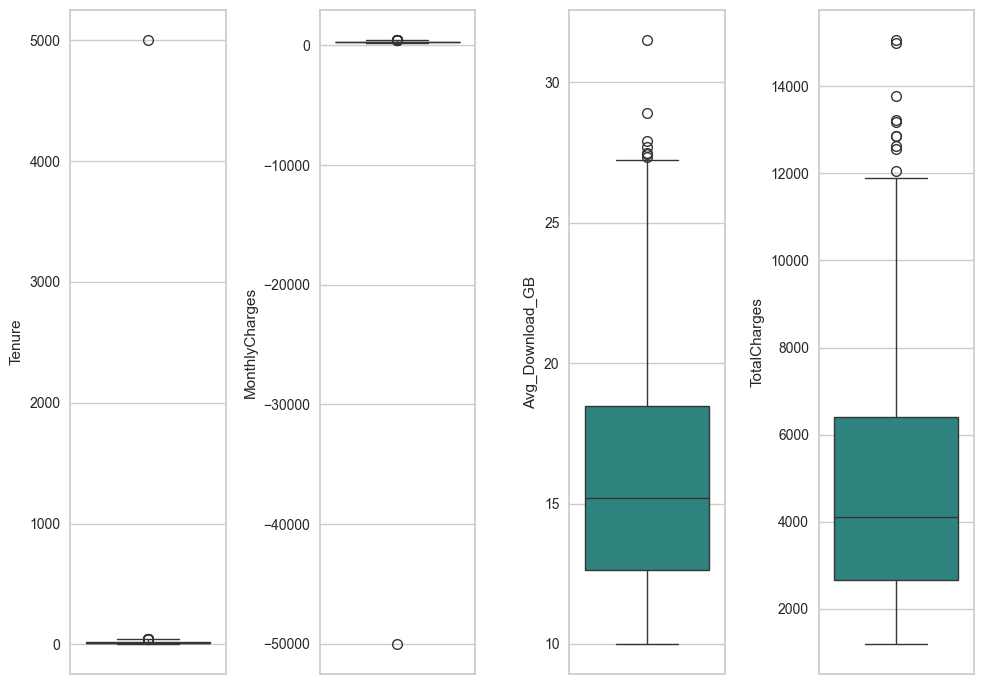

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
for i, colum in enumerate(numeric):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(df[colum], palette='viridis')
plt.tight_layout()
plt.show()

In [25]:

df = df[df['MonthlyCharges'] > 0]


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       999 non-null    object 
 1   Tenure           999 non-null    float64
 2   MonthlyCharges   999 non-null    float64
 3   Avg_Download_GB  999 non-null    float64
 4   InternetService  999 non-null    object 
 5   TotalCharges     982 non-null    float64
dtypes: float64(4), object(2)
memory usage: 54.6+ KB


In [26]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       999 non-null    object 
 1   Tenure           999 non-null    float64
 2   MonthlyCharges   999 non-null    float64
 3   Avg_Download_GB  999 non-null    float64
 4   InternetService  999 non-null    object 
 5   TotalCharges     999 non-null    float64
dtypes: float64(4), object(2)
memory usage: 54.6+ KB


In [21]:
df['InternetService'].value_counts()

InternetService
DSL            234
dsl            196
No             195
Fiber          192
Fiber Optic    182
Name: count, dtype: int64

In [27]:
df['InternetService'] = df['InternetService'].replace('Fiber Optic', 'Fiber')
df['InternetService'].value_counts()

InternetService
Fiber    374
DSL      234
dsl      196
No       195
Name: count, dtype: int64

/tmp/ipykernel_43574/4232848235.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[colum], palette='viridis')
/tmp/ipykernel_43574/4232848235.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[colum], palette='viridis')
/tmp/ipykernel_43574/4232848235.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[colum], palette='viridis')
/tmp/ipykernel_43574/4232848235.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for th

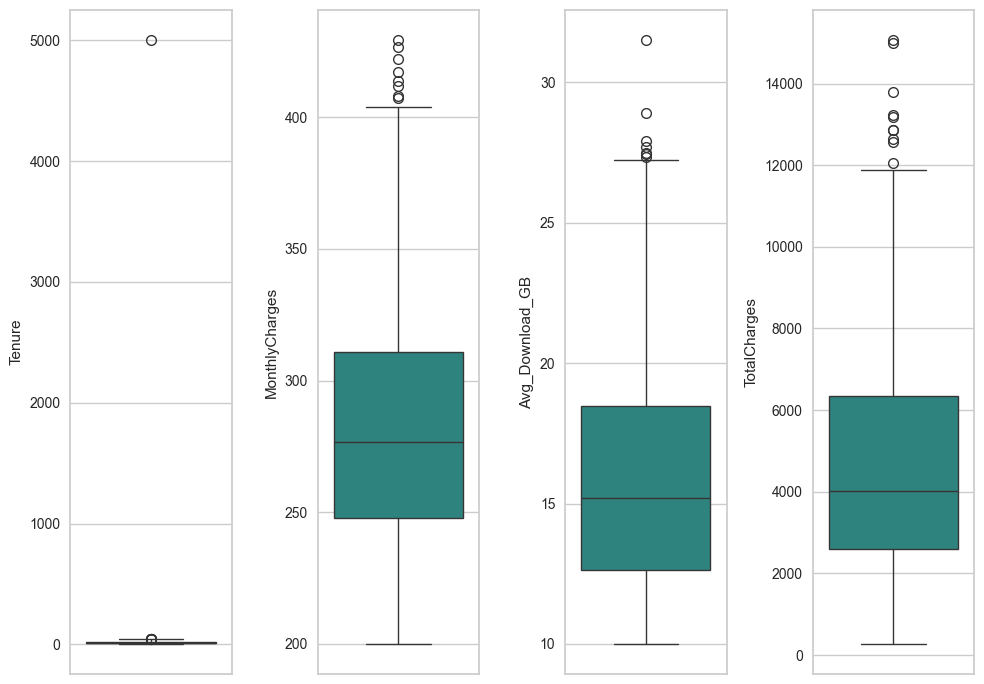

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
for i, colum in enumerate(numeric):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(df[colum], palette='viridis')
plt.tight_layout()
plt.show()

In [28]:
q1 = df[numeric].quantile(0.25)
q3 = df[numeric].quantile(0.75)

iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

condition = ~((df[numeric] < lower ) | (df[numeric] > upper)).any(axis=1)
numeric_features = df.loc[condition, numeric]
numeric_features

,Tenure,MonthlyCharges,Avg_Download_GB,TotalCharges
0,6.984034,283.527889,14.271823,1980.168499
1,17.259832,277.870188,13.020002,4795.992780
2,11.104682,287.368613,15.936825,3191.137036
3,14.872056,334.034120,12.471627,4967.774299
4,21.826164,289.936870,15.576795,6328.209704
...,...,...,...,...
1000,13.091890,276.853004,16.213485,2859.466579
1001,11.459396,268.873797,18.804319,3081.131256
1002,8.760759,214.988956,18.875669,1883.466500
1003,21.534000,323.755726,11.525606,6971.755838


/tmp/ipykernel_42795/2389038404.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(numeric_features[colum], palette='viridis')
/tmp/ipykernel_42795/2389038404.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(numeric_features[colum], palette='viridis')
/tmp/ipykernel_42795/2389038404.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(numeric_features[colum], palette='viridis')
/tmp/ipykernel_42795/2389038404.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

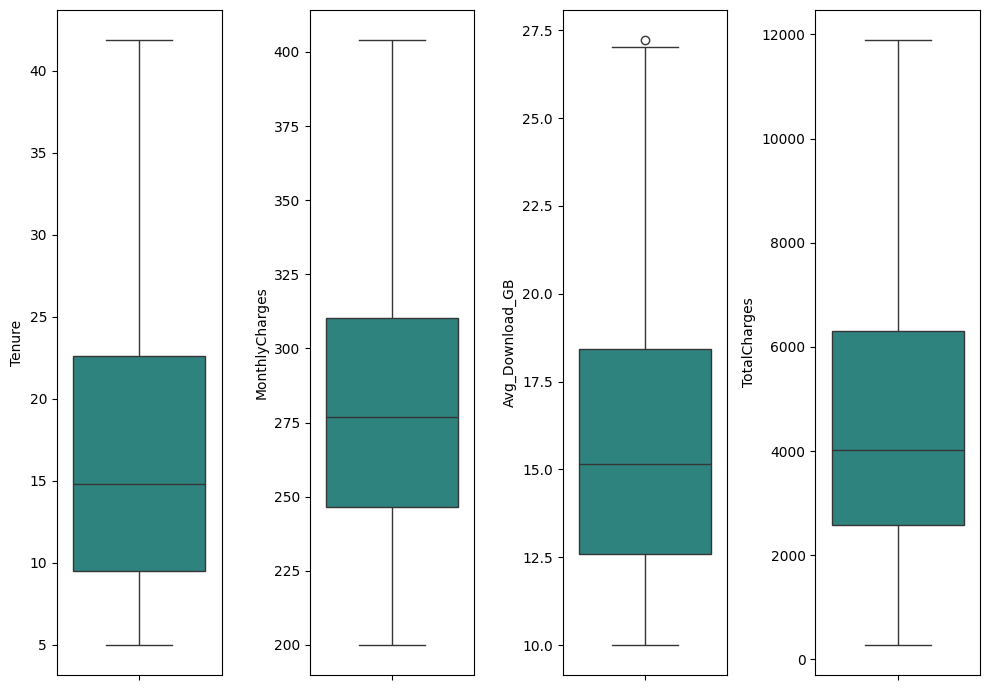

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
for i, colum in enumerate(numeric):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(numeric_features[colum], palette='viridis')
plt.tight_layout()
plt.show()

In [25]:
numeric_features

,Tenure,MonthlyCharges,Avg_Download_GB,TotalCharges
0,6.984034,283.527889,14.271823,1980.168499
1,17.259832,277.870188,13.020002,4795.992780
2,11.104682,287.368613,15.936825,3191.137036
3,14.872056,334.034120,12.471627,4967.774299
4,21.826164,289.936870,15.576795,6328.209704
...,...,...,...,...
1000,13.091890,276.853004,16.213485,2859.466579
1001,11.459396,268.873797,18.804319,3081.131256
1002,8.760759,214.988956,18.875669,1883.466500
1003,21.534000,323.755726,11.525606,6971.755838


In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

fitur = ['Tenure', 'MonthlyCharges', 'Avg_Download_GB']
x = numeric_features[fitur] 

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

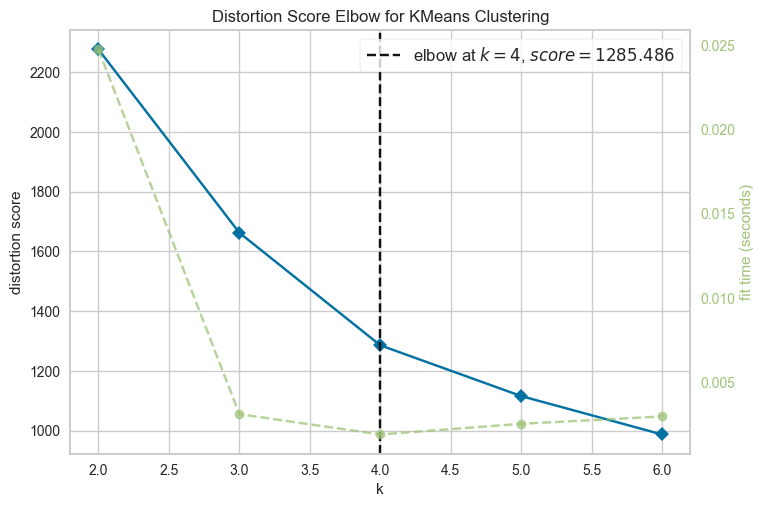

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 7))

visualizer.fit(x_scaled)
visualizer.show()

In [31]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(x_scaled)

numeric_features['Cluster Pelanggan'] = labels

profil = numeric_features.groupby('Cluster Pelanggan')[fitur].mean()
#menambahkan total orang dalam kelompok
profil['Jumlah Pelanggan'] = numeric_features['Cluster Pelanggan'].value_counts()
profil

,Tenure,MonthlyCharges,Avg_Download_GB,Jumlah Pelanggan
Cluster Pelanggan,,,,
0,12.434589,253.881337,13.175013,291
1,14.323221,331.380880,15.498287,252
2,13.060089,260.818496,20.855566,216
3,29.342126,268.764042,14.382762,214


In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Visualisasi 3D Clustering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D
scatter = ax.scatter(numeric_features['Tenure'], 
                     numeric_features['MonthlyCharges'], 
                     numeric_features['Avg_Download_GB'],
                     c=numeric_features['Cluster Pelanggan'], 
                     cmap='viridis', 
                     s=50, 
                     alpha=0.6,
                     edgecolors='w',
                     linewidth=0.5)

ax.set_xlabel('Tenure (bulan)')
ax.set_ylabel('Monthly Charges (ribu Rp)')
ax.set_zlabel('Avg Download GB')
ax.set_title('3D Clustering - Perilaku Pelanggan Telekomunikasi')

plt.colorbar(scatter, ax=ax, label='Cluster', pad=0.1, shrink=0.8)
plt.tight_layout()
plt.show()

ImportError: cannot import name 'docstring' from 'matplotlib' (/home/ahmad/.local/lib/python3.10/site-packages/matplotlib/__init__.py)

In [ ]:
# Hapus versi lokal yang bikin konflik
!pip uninstall matplotlib -y

Found existing installation: matplotlib 3.10.8
Uninstalling matplotlib-3.10.8:
  Successfully uninstalled matplotlib-3.10.8
